<a href="https://colab.research.google.com/github/Devphadatare/CBTCIP/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Datasets

In [2]:
unemploy_data = pd.read_csv('unemploy_data.csv')
unemploy_rate = pd.read_csv('unemploy_rate.csv')

Convert 'Date' Columns to Datetime Format

In [3]:
unemploy_data['Date'] = pd.to_datetime(unemploy_data['Date'], format='%d-%m-%Y')
unemploy_rate['Date'] = pd.to_datetime(unemploy_rate['Date'], format='%d-%m-%Y')

Merge Datasets

In [4]:
# Merge datasets on 'Region' and 'Date'
merged_data = pd.merge(unemploy_data, unemploy_rate, on=['Region', 'Date'], suffixes=('_data', '_rate'))

Drop Duplicated Columns

In [5]:
cleaned_data = merged_data.drop(columns=[
    'Estimated Unemployment Rate (%)_data',
    'Estimated Employed_data',
    'Estimated Labour Participation Rate (%)_data'
])

Renaming Columns

In [6]:
cleaned_data = cleaned_data.rename(columns={
    'Estimated Unemployment Rate (%)_rate': 'Unemployment Rate (%)',
    'Estimated Employed_rate': 'Employed',
    'Estimated Labour Participation Rate (%)_rate': 'Labour Participation Rate (%)'
})

Check the Columns of the Cleaned Data

In [7]:
print(cleaned_data.columns)

Index(['Region', 'Date', 'Frequency_data', 'Area', 'Frequency_rate',
       'Unemployment Rate (%)', 'Employed', 'Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')


Compute Descriptive Statistics

In [8]:
# Compute descriptive statistics for key columns
descriptive_stats = cleaned_data[['Unemployment Rate (%)', 'Employed', 'Labour Participation Rate (%)']].describe()
print(descriptive_stats)


       Unemployment Rate (%)      Employed  Labour Participation Rate (%)
count             306.000000  3.060000e+02                     306.000000
mean               14.170229  1.407279e+07                      41.487680
std                12.352776  1.315823e+07                       8.385149
min                 0.580000  1.175420e+05                      16.770000
25%                 5.502500  3.229258e+06                      37.382500
50%                10.580000  9.975485e+06                      40.395000
75%                18.732500  2.050661e+07                      44.205000
max                75.850000  5.943376e+07                      69.690000


Heatmap: Correlation Between Unemployment Rate, Employed, and Labour Participation Rate

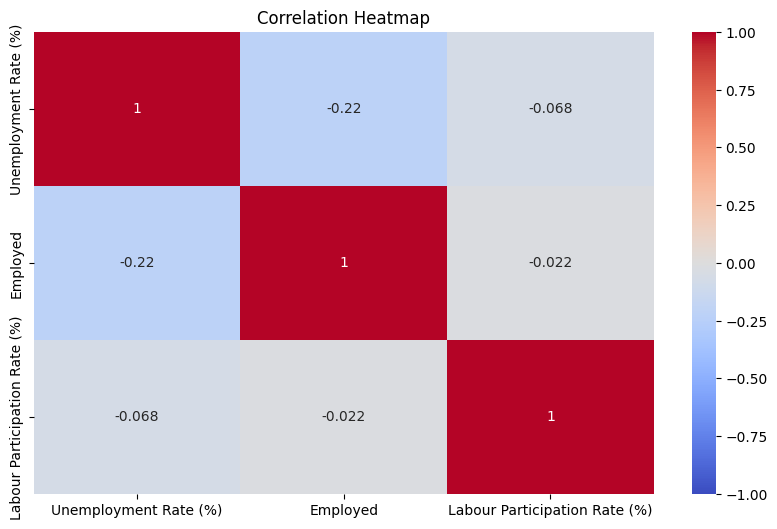

In [9]:
plt.figure(figsize=(10, 6))
correlation_matrix = cleaned_data[['Unemployment Rate (%)', 'Employed', 'Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Bar Plot: Average Unemployment Rate by Region

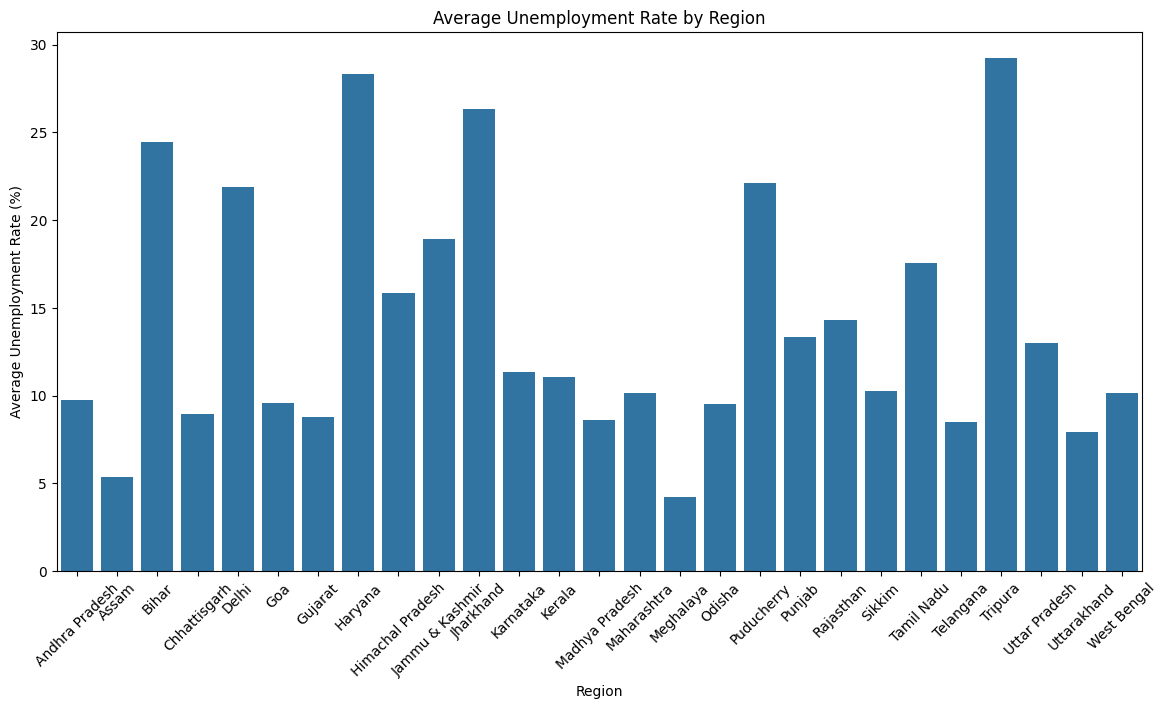

In [10]:
avg_unemployment_by_region = cleaned_data.groupby('Region')['Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_unemployment_by_region, x='Region', y='Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

Scatter Plot: Unemployment Rate vs Labour Participation Rate

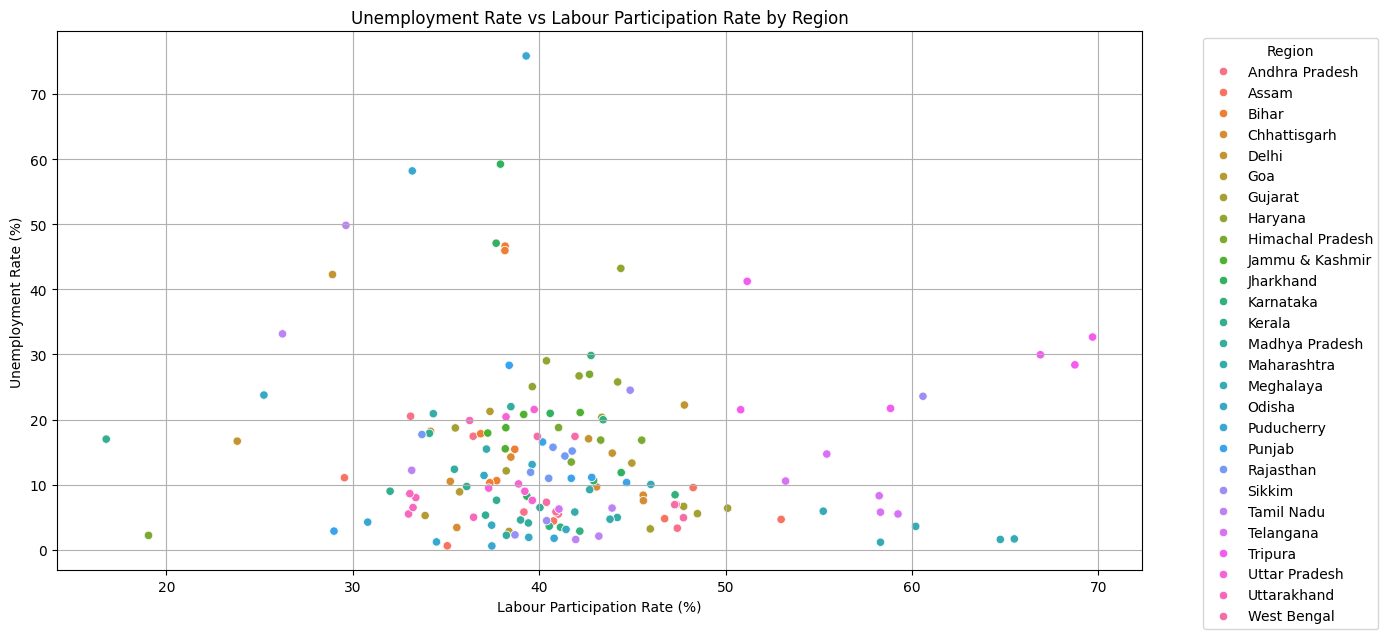

In [11]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=cleaned_data, x='Labour Participation Rate (%)', y='Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate vs Labour Participation Rate by Region')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Facet Grid: Time Series Plots for Each Region

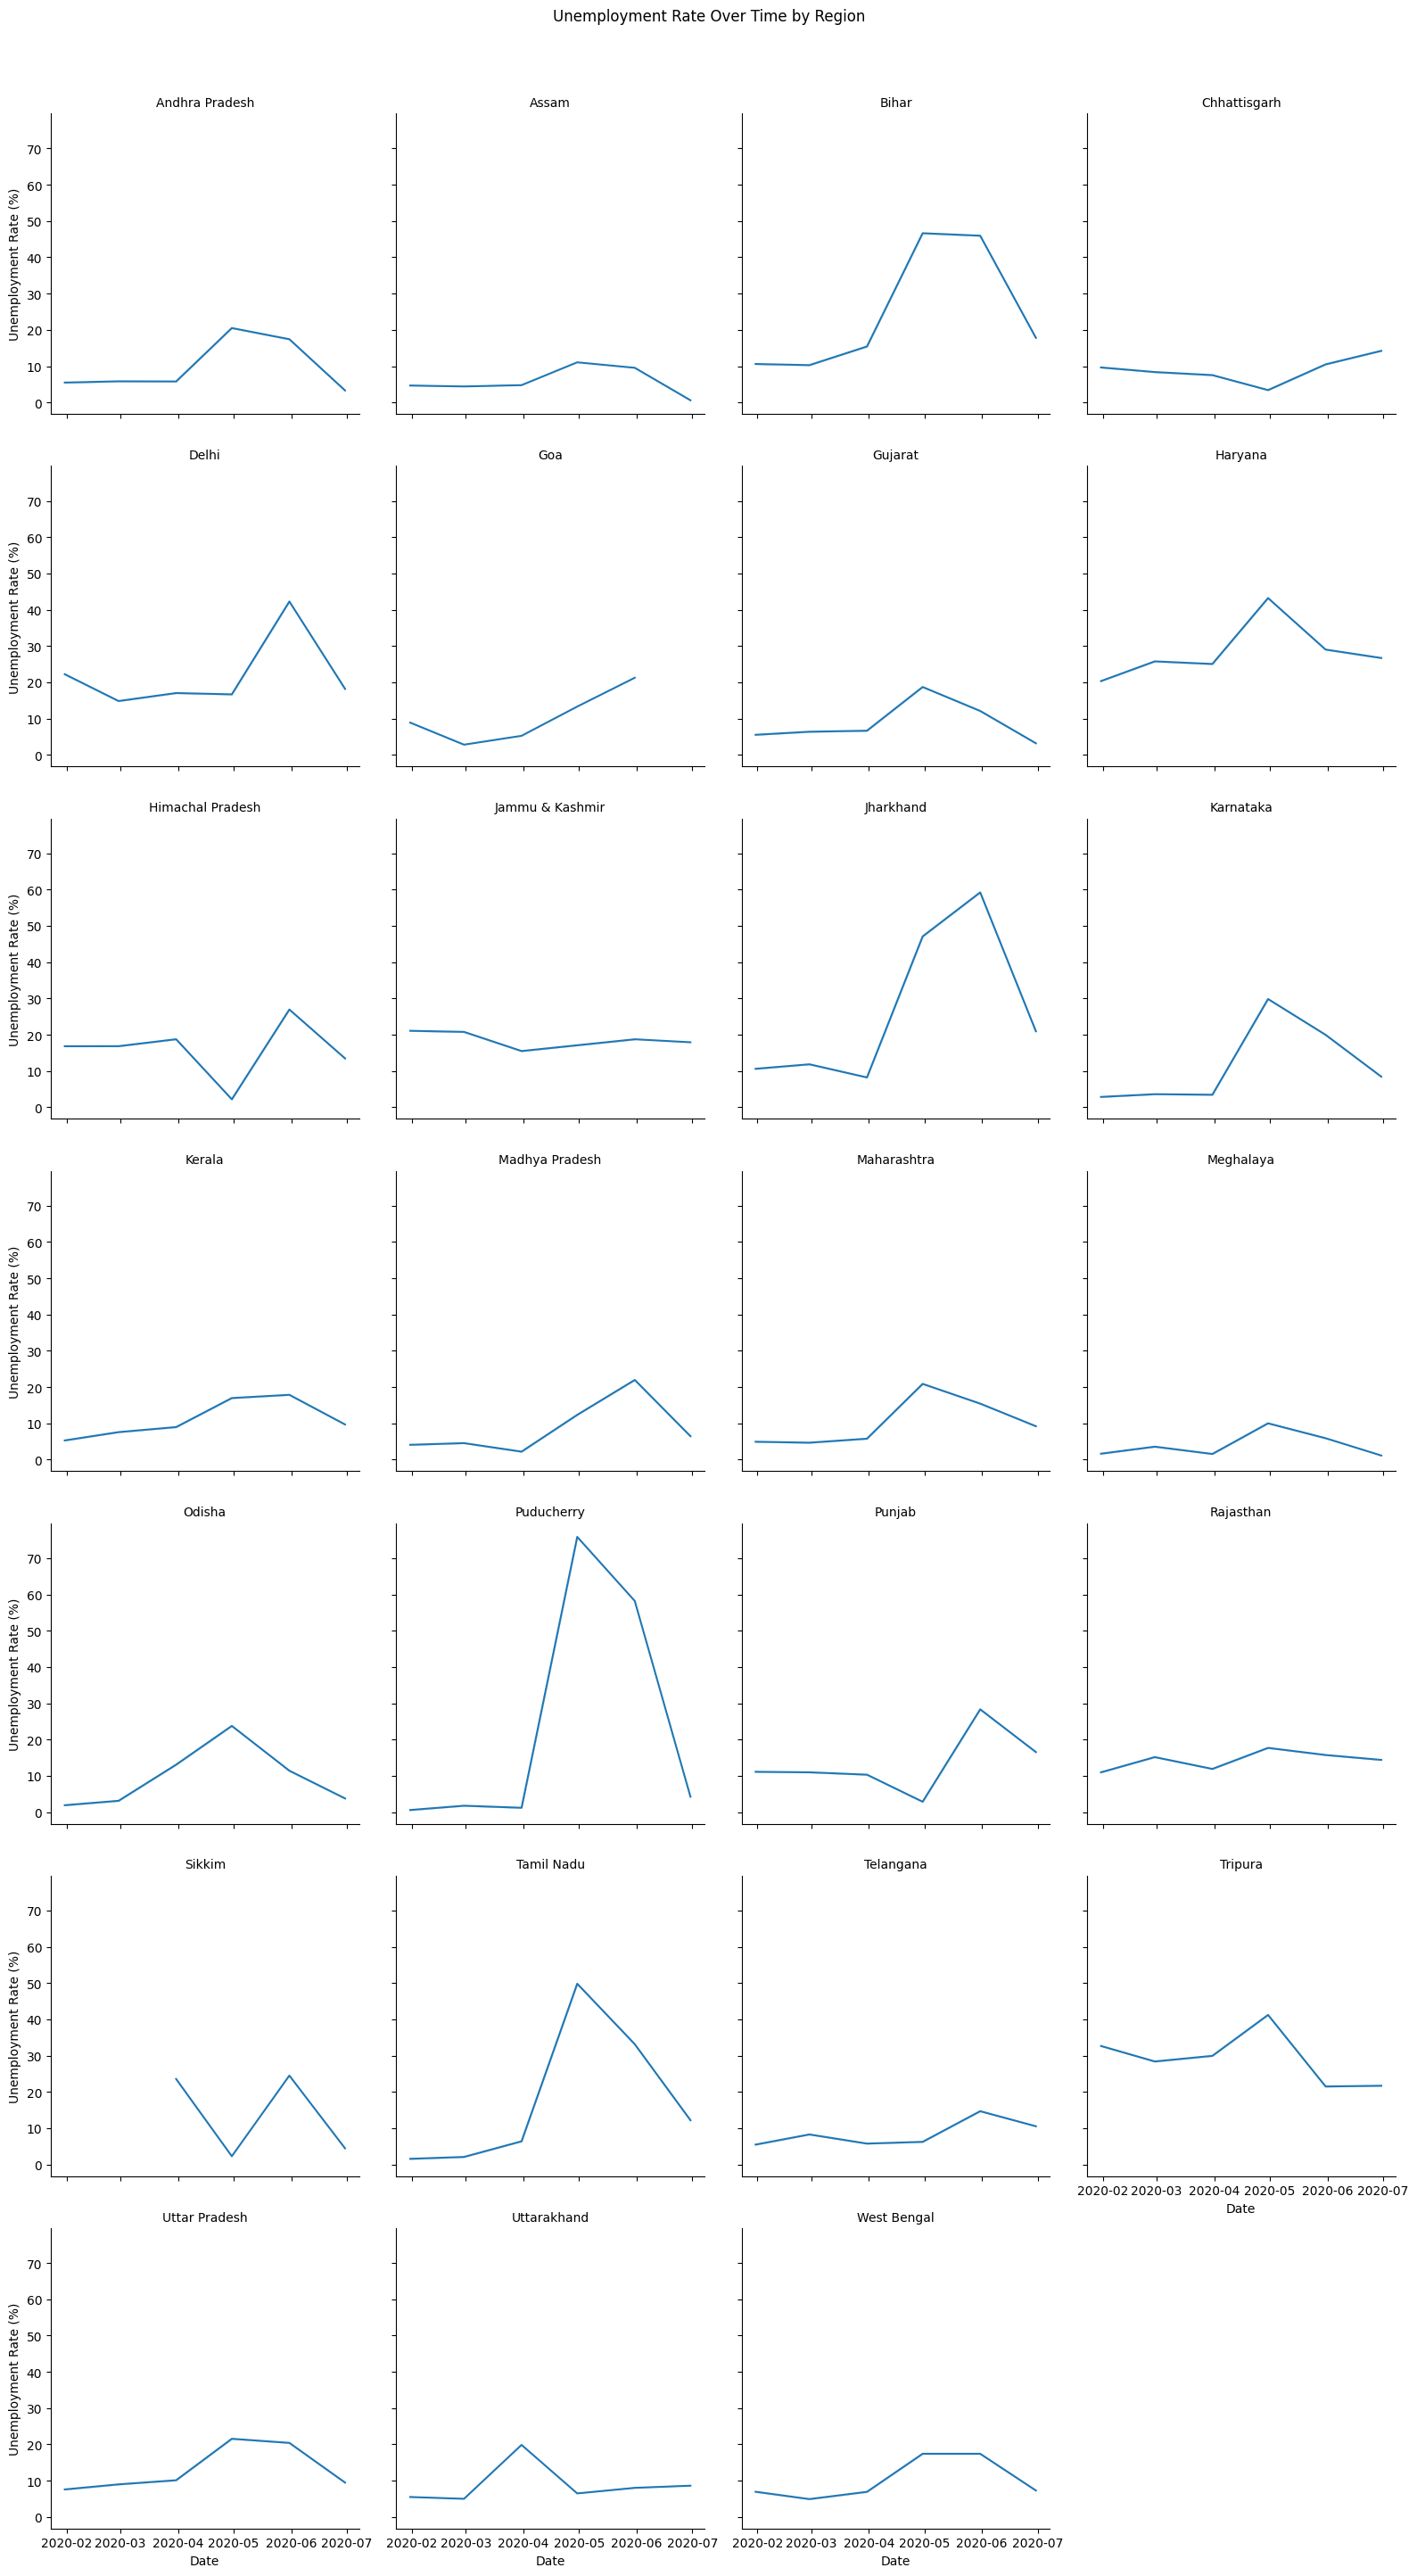

In [12]:
g = sns.FacetGrid(cleaned_data, col="Region", col_wrap=4, height=4)
g.map(sns.lineplot, "Date", "Unemployment Rate (%)")
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Unemployment Rate (%)")
g.fig.suptitle('Unemployment Rate Over Time by Region', y=1.03)
plt.show()